In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas matplotlib

In [152]:
import sqlite3, random
import xml.dom.minidom as xd
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
conn = sqlite3.connect('../data/soccer/database.sqlite')

In [81]:
df = pd.read_sql_query('''SELECT Match.date, Match.league_id,
                                    AwayTeam.team_long_name AS away_team_name, Match.away_team_goal,
                                    HomeTeam.team_long_name AS home_team_name, Match.home_team_goal,
                                    Match.home_player_X1, Match.home_player_Y1,
                                    Match.home_player_X2, Match.home_player_Y2,
                                    Match.home_player_X3, Match.home_player_Y3,
                                    Match.home_player_X4, Match.home_player_Y4,
                                    Match.home_player_X5, Match.home_player_Y5,
                                    Match.home_player_X6, Match.home_player_Y6,
                                    Match.home_player_X7, Match.home_player_Y7,
                                    Match.home_player_X8, Match.home_player_Y8,
                                    Match.home_player_X9, Match.home_player_Y9,
                                    Match.home_player_X10, Match.home_player_Y10,
                                    Match.home_player_X11, Match.home_player_Y11,
                                    Match.away_player_X1, Match.away_player_Y1,
                                    Match.away_player_X2, Match.away_player_Y2,
                                    Match.away_player_X3, Match.away_player_Y3,
                                    Match.away_player_X4, Match.away_player_Y4,
                                    Match.away_player_X5, Match.away_player_Y5,
                                    Match.away_player_X6, Match.away_player_Y6,
                                    Match.away_player_X7, Match.away_player_Y7,
                                    Match.away_player_X8, Match.away_player_Y8,
                                    Match.away_player_X9, Match.away_player_Y9,
                                    Match.away_player_X10, Match.away_player_Y10,
                                    Match.away_player_X11, Match.away_player_Y11
                        FROM Match
                        JOIN Team AwayTeam ON AwayTeam.team_api_id = Match.away_team_api_id
                        JOIN Team HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                        JOIN League ON League.country_id = Match.league_id AND League.name = "England Premier League"''', conn)

In [157]:
pd.set_option('display.max_columns', None)
df2 = pd.read_sql_query('select * from Match join League on League.country_id = Match.league_id and League.name = "England Premier League"', conn)
goal_info = df2['goal'].iloc[5]
print(xd.parseString(goal_info).toprettyxml())

<?xml version="1.0" ?>
<goal>
	<value>
		<comment>n</comment>
		<stats>
			<goals>1</goals>
			<shoton>1</shoton>
		</stats>
		<event_incident_typefk>407</event_incident_typefk>
		<elapsed>22</elapsed>
		<player2>23916</player2>
		<subtype>distance</subtype>
		<player1>30342</player1>
		<sortorder>0</sortorder>
		<team>8655</team>
		<id>376354</id>
		<n>252</n>
		<type>goal</type>
		<goal_type>n</goal_type>
	</value>
	<value>
		<comment>n</comment>
		<stats>
			<goals>1</goals>
			<shoton>1</shoton>
		</stats>
		<elapsed_plus>2</elapsed_plus>
		<event_incident_typefk>130</event_incident_typefk>
		<elapsed>45</elapsed>
		<subtype>direct_freekick</subtype>
		<player1>24011</player1>
		<sortorder>0</sortorder>
		<team>8668</team>
		<id>376795</id>
		<n>277</n>
		<type>goal</type>
		<goal_type>n</goal_type>
	</value>
	<value>
		<comment>n</comment>
		<stats>
			<goals>1</goals>
			<shoton>1</shoton>
		</stats>
		<event_incident_typefk>406</event_incident_typefk>
		<elapsed>65</elapsed>
		<

(away) Fulham 0 : 1 Everton (home)


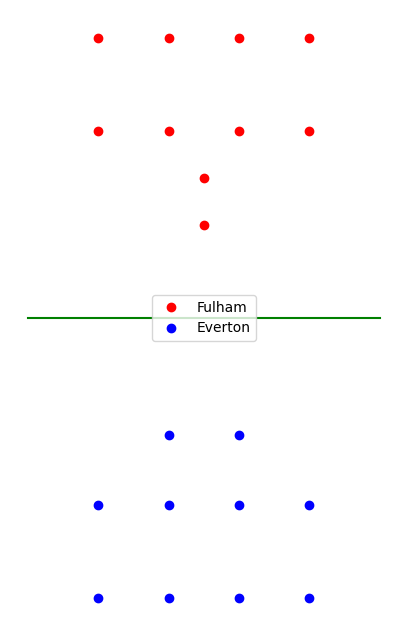

In [181]:
game_id = random.randint(0, 3039)
show_result(df, game_id)
show_formations(df, game_id)

In [121]:
def show_result(df, game_id):
    game = df.iloc[game_id]
    print(f'(away) {game['away_team_name']} {game['away_team_goal']} : {game['home_team_goal']} {game['home_team_name']} (home)')

In [112]:
def show_formations(df, game_id):
    plt.figure(figsize=(5, 8))
    
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(df[f'away_player_X{i}'].iloc[game_id])
        y.append(30 - df[f'away_player_Y{i}'].iloc[game_id])
    
    plt.plot(x, y, 'o', color='r')
        
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(df[f'home_player_X{i}'].iloc[game_id])
        y.append(df[f'home_player_Y{i}'].iloc[game_id])
    
    plt.plot(x, y, 'o', color='b')
    plt.plot([0,10],[15,15],color='g')

    plt.legend([df['away_team_name'].iloc[game_id], df['home_team_name'].iloc[game_id]])
    plt.axis('off')
    plt.show()